In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


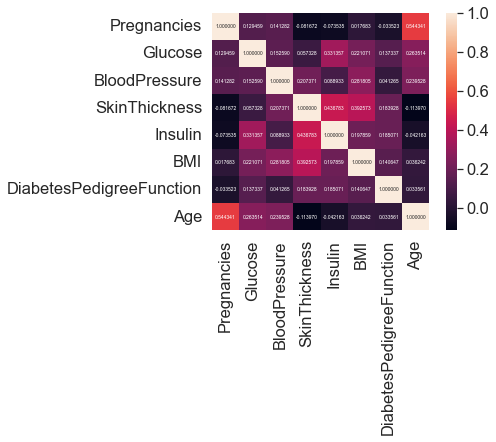

In [3]:
import numpy as np
cm= np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='2f',annot_kws={'size':5},yticklabels=cols,xticklabels=cols)
plt.show()

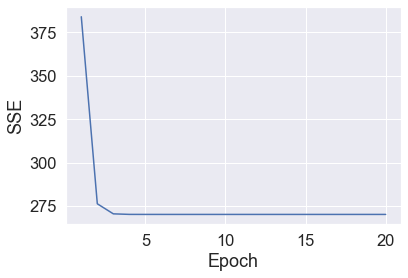

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y[:,0] - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)
df=pd.read_csv('diabetes.csv')
X = df[['Age']].values
y = df[['Pregnancies']].values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()



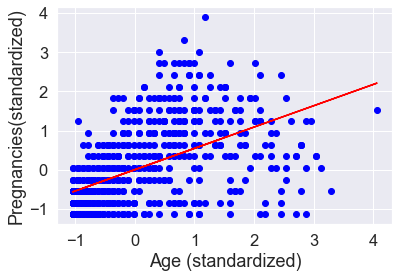

In [5]:

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None
lin_regplot(X_std, y_std, lr)
plt.xlabel('Age (standardized)')
plt.ylabel('Pregnancies(standardized)')
plt.show()

In [6]:
X = df[['Age']].values 
y = df[['Pregnancies']].values 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
sc_y = StandardScaler() 
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
age_std = sc_x.transform([[20]])
pregnancy_std = lr.predict(age_std)
print("Pregnancy: %.3f" %sc_y.inverse_transform([pregnancy_std]))
print('Slope: %.3f' % lr.w_[1])

Pregnancy: 1.780
Slope: 0.544


In [7]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=99)
train_x.shape, train_y.shape
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(train_x,train_y)
y_pred = le.predict(test_x)
y_pred
result = pd.DataFrame({'Actual': test_y[:,0], 'Predict' : y_pred[:,0]})
result

,Actual,Predict
0,0,8.233150
1,4,2.476792
2,4,2.632370
3,3,2.321215
4,3,2.632370
...,...,...
226,12,6.055069
227,3,6.677377
228,9,5.588337
229,8,9.166613


In [8]:
print ('coefficient', le.coef_)
print('intercept', le.intercept_)

coefficient [[0.15557723]]
intercept [-1.41263827]


In [9]:
import datacompy
import pandas as pd
df1=pd.read_csv("diabetes.csv")
df2=pd.read_csv("diabetes.csv")
compare = datacompy.Compare(df1,df2,join_columns='BMI', abs_tol=0.0001,rel_tol=0,df1_name='olddiabetes',df2_name='newdiabetes')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

     DataFrame  Columns  Rows
0  olddiabetes        9   768
1  newdiabetes        9   768

Column Summary
--------------

Number of columns in common: 9
Number of columns in olddiabetes but not in newdiabetes: 0
Number of columns in newdiabetes but not in olddiabetes: 0

Row Summary
-----------

Matched on: bmi
Any duplicates on match values: Yes
Absolute Tolerance: 0.0001
Relative Tolerance: 0
Number of rows in common: 768
Number of rows in olddiabetes but not in newdiabetes: 0
Number of rows in newdiabetes but not in olddiabetes: 0

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 768

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 9
Total number of values which compare unequal: 0


